# Pre-Processing Notebook, clipping data to region of interest + buffering watercourses

# Import packages

In [ ]:
pip install folium matplotlib palettable pysal geopandas



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Import packages
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/spaghetti/network.py:41: FutureWarning: The next major release of pysal/spaghetti (2.0.0) will drop support for all ``libpysal.cg`` geometries. This change is a first step in refactoring ``spaghetti`` that is expected to result in dramatically reduced runtimes for network instantiation and operations. Users currently requiring network and point pattern input as ``libpysal.cg`` geometries should prepare for this simply by converting to ``shapely`` geometries.
  warnings.warn(dep_msg, FutureWarning, stacklevel=1)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Import watercourses and Clip them to Region

In [4]:
#Load region file
Region = gpd.read_file('/Users/marion/Desktop/Etudes - Leeds/Semester 2/Creative Coding for Real World Problems/Topic 4/DataSet/final_filtered_counties/filt_counties2.shp')
Region.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CTYUA23CD   6 non-null      object  
 1   CTYUA23NM   6 non-null      object  
 2   CTYUA23NMW  0 non-null      object  
 3   BNG_E       6 non-null      int64   
 4   BNG_N       6 non-null      int64   
 5   LONG        6 non-null      float64 
 6   LAT         6 non-null      float64 
 7   GlobalID    6 non-null      object  
 8   geometry    6 non-null      geometry
dtypes: float64(2), geometry(1), int64(2), object(4)
memory usage: 564.0+ bytes


In [5]:
#Load watercourses file
Watercourses = gpd.read_file('/Users/marion/Desktop/Etudes - Leeds/Semester 2/Creative Coding for Real World Problems/Topic 4/DataSet/To Share/OS_Exported/Watercourses.shp')
Watercourses.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2527826 entries, 0 to 2527825
Data columns (total 3 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        float64 
 1   type      object  
 2   geometry  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 57.9+ MB


In [6]:
print(Region.crs)
print(Watercourses.crs)

EPSG:27700
EPSG:27700


In [7]:
#Clip the Rivers to the England outline
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Water = gpd.clip(Watercourses, Region_outline)

<Axes: >

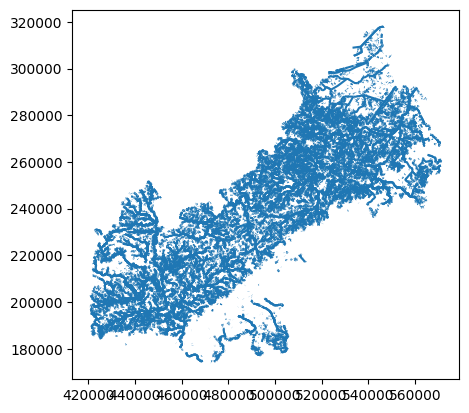

In [8]:
Filtered_Water.plot()

In [12]:
Filtered_Water.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53310 entries, 2103926 to 114330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        53310 non-null  float64 
 1   type      53310 non-null  object  
 2   geometry  53310 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.6+ MB


In [8]:
#Save  dataset
Filtered_Water.to_file("Clip_Watercourses.shp")

# Clip Contours

In [ ]:
#Load contours file
Contours = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/Contours.shp')
Contours.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 973665 entries, 0 to 973664
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        973665 non-null  float64 
 1   type      973665 non-null  object  
 2   height    973665 non-null  float64 
 3   geometry  973665 non-null  geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 29.7+ MB


In [10]:
print(Contours.crs)

EPSG:27700


In [11]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Contours = gpd.clip(Contours, Region_outline)

In [12]:
#Save  dataset
Filtered_Contours.to_file("Clip_Contours.shp")

# Clip ETL

In [ ]:
#Load ETL file
ETL = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/ETL.shp')
ETL.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3453 entries, 0 to 3452
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        3453 non-null   float64 
 1   geometry  3453 non-null   geometry
dtypes: float64(1), geometry(1)
memory usage: 54.1 KB


In [14]:
print(ETL.crs)

EPSG:27700


In [15]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_ETL = gpd.clip(ETL, Region_outline)

In [16]:
#Save  dataset
Filtered_ETL.to_file("Clip_ETL.shp")

# Clip Rail

In [ ]:
#Load Rail file
Rail = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/Rail.shp')
Rail.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 115540 entries, 0 to 115539
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        115540 non-null  float64 
 1   type      115540 non-null  object  
 2   geometry  115540 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 2.6+ MB


In [18]:
print(Rail.crs)

EPSG:27700


In [19]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Rail = gpd.clip(Rail, Region_outline)

In [20]:
#Save  dataset
Filtered_Rail.to_file("Clip_Rail.shp")

<Axes: >

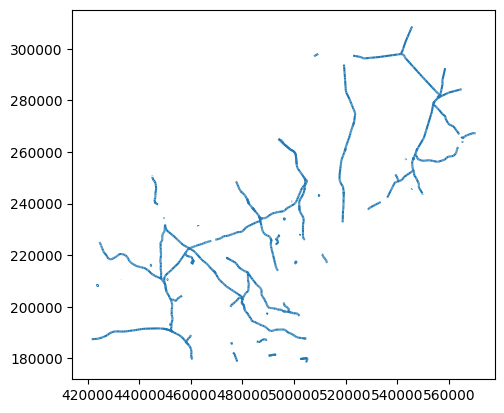

In [21]:
Filtered_Rail.plot()

# Clip Roads_local

In [22]:
Road_Local = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/Roads_local.shp')
Road_Local.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3234917 entries, 0 to 3234916
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   id        float64 
 1   type      object  
 2   name      object  
 3   number    object  
 4   level     int64   
 5   geometry  geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 148.1+ MB


In [23]:
print(Road_Local.crs)

EPSG:27700


In [24]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Road_Local = gpd.clip(Road_Local, Region_outline)

In [25]:
#Save  dataset
Filtered_Road_Local.to_file("Clip_Road_Local.shp")

# Clip Roads_National

In [26]:
Road_National = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/Roads_national.shp')
Road_National.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 123683 entries, 0 to 123682
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        123683 non-null  float64 
 1   type      123683 non-null  object  
 2   name      66834 non-null   object  
 3   number    123683 non-null  object  
 4   level     123683 non-null  int64   
 5   geometry  123683 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 5.7+ MB


In [27]:
print(Road_National.crs)

EPSG:27700


In [28]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Road_National = gpd.clip(Road_National, Region_outline)

In [29]:
#Save  dataset
Filtered_Road_National.to_file("Clip_Road_National.shp")

# Clip Roads_regional

In [30]:
Road_Regional = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/OS_Exported/Roads_regional.shp')
Road_Regional.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 347324 entries, 0 to 347323
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   id        347324 non-null  float64 
 1   type      347324 non-null  object  
 2   name      255618 non-null  object  
 3   number    346332 non-null  object  
 4   level     346332 non-null  float64 
 5   geometry  347324 non-null  geometry
dtypes: float64(2), geometry(1), object(3)
memory usage: 15.9+ MB


In [31]:
print(Road_Regional.crs)

EPSG:27700


In [32]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Road_Regional = gpd.clip(Road_Regional, Region_outline)

In [33]:
#Save  dataset
Filtered_Road_Regional.to_file("Clip_Road_Regional.shp")

# Clip Land Cover

In [39]:
Land_Cover = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/Habitats/lcm-2023-vec_5917687.gpkg')
Land_Cover.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5379659 entries, 0 to 5379658
Data columns (total 10 columns):
 #   Column        Dtype   
---  ------        -----   
 0   _conf         object  
 1   _hist         object  
 2   _mode         object  
 3   _n            object  
 4   _purity       object  
 5   _stdev        object  
 6   _agg          object  
 7   gid           object  
 8   Habitat_type  object  
 9   geometry      geometry
dtypes: geometry(1), object(9)
memory usage: 410.4+ MB


In [40]:
print(Land_Cover.crs)

EPSG:27700


In [41]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Land_Cover = gpd.clip(Land_Cover, Region_outline)

In [42]:
#Save  dataset
Filtered_Land_Cover.to_file("Clip_Land_Cover.shp")

/var/folders/jf/zd5s0sjd3v1667bd2qq6pr8w0000gn/T/ipykernel_16842/2239743777.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Filtered_Land_Cover.to_file("Clip_Land_Cover.shp")
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Habitat_type' to 'Habitat_ty'
  ogr_write(


# Clip Agricultural Land Classification

In [35]:
#Load Agricultural Land Classification file
Agri_Land = gpd.read_file('/Users/marion/Downloads/DataSet/Provisional Agricultural Land Classification (ALC) (England)_1909723263035822565.gpkg')
Agri_Land.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GEOGEXT    1765 non-null   object  
 1   AREA       1765 non-null   float64 
 2   ALC_GRADE  1826 non-null   object  
 3   PERIMETER  1765 non-null   float64 
 4   geometry   1826 non-null   geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 71.5+ KB


In [36]:
print(Agri_Land.crs)

EPSG:27700


In [37]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Agri_Land = gpd.clip(Agri_Land, Region_outline)

In [38]:
#Save  dataset
Filtered_Agri_Land.to_file("Clip_Agri_Land.shp")

In [5]:
print(Agri_Land.crs)

EPSG:27700


# Clip Protected Areas

In [43]:
Protected_Area = gpd.read_file('/Users/marion/Downloads/DataSet/To Share/Protected_areas.shp')
Protected_Area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16583 entries, 0 to 16582
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        4280 non-null   float64 
 1   Type      16583 non-null  object  
 2   geometry  16583 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 388.8+ KB


In [44]:
print(Protected_Area.crs)

EPSG:4326


In [45]:
Protected_Area = Protected_Area.to_crs('EPSG:27700')
print(Protected_Area.crs)

EPSG:27700


In [46]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Protected_Area = gpd.clip(Protected_Area, Region_outline)

In [47]:
#Save  dataset
Filtered_Protected_Area.to_file("Clip_Protected_Area.shp")

# Clip Flood Risk Areas

In [51]:
Flood_Risk_Area = gpd.read_file('/Users/marion/Downloads/DataSet/Flood_Risk_Areas/Flood_Risk_AreasPolygon.shp')
Flood_Risk_Area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fra_id      189 non-null    object  
 1   fra_name    189 non-null    object  
 2   frr_cycle   189 non-null    int32   
 3   flood_sour  189 non-null    object  
 4   geometry    189 non-null    geometry
dtypes: geometry(1), int32(1), object(3)
memory usage: 6.8+ KB


In [52]:
print(Flood_Risk_Area .crs)

EPSG:27700


In [53]:
Region['outline'] = 1
Region_outline = Region.dissolve(by = 'outline')
Filtered_Flood_Risk_Area = gpd.clip(Flood_Risk_Area, Region_outline)

<Axes: >

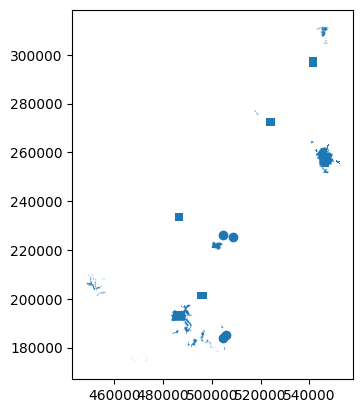

In [55]:
Filtered_Flood_Risk_Area.plot()

In [57]:
Filtered_Flood_Risk_Area.geom_type.unique()

array(['MultiPolygon', 'Polygon', 'GeometryCollection'], dtype=object)

In [58]:
#Separate MultiPolygons into individual Polygons
Filtered_Flood_Risk_Area = Filtered_Flood_Risk_Area.explode(index_parts=False)
Filtered_Flood_Risk_Area.geom_type.unique()

array(['Polygon', 'Point'], dtype=object)

In [60]:
#Delete points to keep only polygons
Filtered_Flood_Risk_Area = Filtered_Flood_Risk_Area[Filtered_Flood_Risk_Area.geom_type == 'Polygon']
Filtered_Flood_Risk_Area.geom_type.unique()


array(['Polygon'], dtype=object)

In [61]:
#Save  dataset
Filtered_Flood_Risk_Area .to_file("Clip_Flood_Risk_Area.shp")

# Create 200m River Buffer (100m on each side of the river)

In [13]:
#Create copy to perform buffering
Filtered_Water_buffer = Filtered_Water.copy()

#Perform buffering, while retaining the geometry column (does not affect the 'id')
Filtered_Water_buffer['geometry'] = Filtered_Water_buffer['geometry'].buffer(100)
Filtered_Water_buffer.head()

,id,type,geometry
2103926,2103927.0,Local,"POLYGON ((434029.645 187012.301, 434027.885 18..."
2103927,2103928.0,Local,"POLYGON ((434260.766 186994.852, 434251.172 18..."
2103912,2103913.0,Local,"POLYGON ((432590.293 187357.004, 432589.546 18..."
2103916,2103917.0,Local,"POLYGON ((433195.149 187395.367, 433188.426 18..."
2103918,2103919.0,Local,"POLYGON ((433269.733 187524.546, 433271.342 18..."


<Axes: >

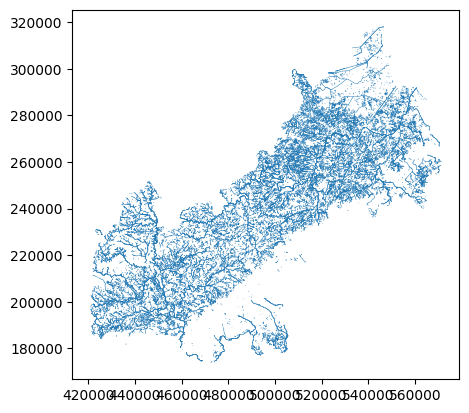

In [14]:
Filtered_Water_buffer.plot()

In [15]:
Filtered_Water_buffer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 53310 entries, 2103926 to 114330
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        53310 non-null  float64 
 1   type      53310 non-null  object  
 2   geometry  53310 non-null  geometry
dtypes: float64(1), geometry(1), object(1)
memory usage: 1.6+ MB


In [16]:
#Save  dataset
Filtered_Water_buffer.to_file("Clip_Watercourses_Buffer.shp")

# Flood Risk Area Intersect Analysis

In [ ]:
#Load Clipped Flood Risk Area file
Clip_Flood_Risk_Area = gpd.read_file('/Users/marion/Desktop/Etudes - Leeds/Semester 2/Creative Coding for Real World Problems/Topic 4/Clipped_Data/Clip_Flood_Risk_Area/Clip_Flood_Risk_Area.shp')
Clip_Flood_Risk_Area.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   fra_id      294 non-null    object  
 1   fra_name    294 non-null    object  
 2   frr_cycle   294 non-null    int32   
 3   flood_sour  294 non-null    object  
 4   geometry    294 non-null    geometry
dtypes: geometry(1), int32(1), object(3)
memory usage: 10.5+ KB


<Axes: >

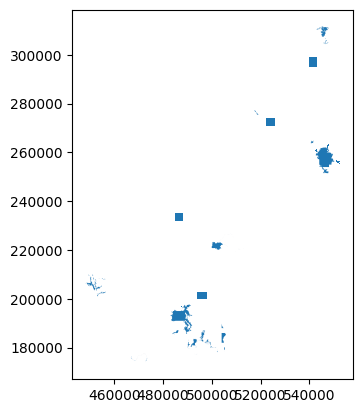

In [63]:
Clip_Flood_Risk_Area.plot()

In [66]:
#Load Clipped Buffer Watercourses file
Clip_Watercourses_Buffer = gpd.read_file('/Users/marion/Desktop/Etudes - Leeds/Semester 2/Creative Coding for Real World Problems/Topic 4/Clip_Watercourses_Buffer/Clip_Watercourses_Buffer.shp')
Clip_Watercourses_Buffer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53310 entries, 0 to 53309
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FID       53310 non-null  int64   
 1   geometry  53310 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 833.1 KB


<Axes: >

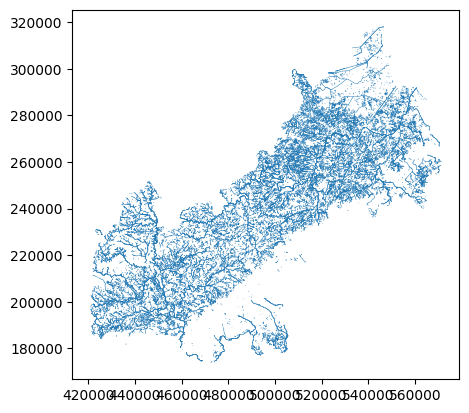

In [67]:
Clip_Watercourses_Buffer.plot()

In [69]:
Clip_Watercourses_Buffer.head()

,FID,geometry
0,0,"POLYGON ((434029.645 187012.301, 434027.885 18..."
1,1,"POLYGON ((434260.766 186994.852, 434251.172 18..."
2,2,"POLYGON ((432590.293 187357.004, 432589.546 18..."
3,3,"POLYGON ((433195.149 187395.367, 433188.426 18..."
4,4,"POLYGON ((433269.733 187524.546, 433271.342 18..."


In [70]:
Clip_Flood_Risk_Area

,fra_id,fra_name,frr_cycle,flood_sour,geometry
0,UK06A0026ENG,"Reading, Thames",2,Rivers and Sea,"POLYGON ((473599.608 175620.923, 473600.002 17..."
1,UK06A0026ENG,"Reading, Thames",2,Rivers and Sea,"POLYGON ((472986.448 174565.774, 472981.871 17..."
2,UK06A0026ENG,"Reading, Thames",2,Rivers and Sea,"POLYGON ((468051.254 174788.524, 468056.334 17..."
3,UK06A0026ENG,"Reading, Thames",2,Rivers and Sea,"POLYGON ((468409.552 174629.39, 468413.555 174..."
4,UK06A0026ENG,"Reading, Thames",2,Rivers and Sea,"POLYGON ((466943.829 176424.083, 466946.503 17..."
...,...,...,...,...,...
289,UK06A0024ENG,"Oxford, Thames",2,Rivers and Sea,"POLYGON ((448152.273 206080.17, 448147.711 206..."
290,UK06A0024ENG,"Oxford, Thames",2,Rivers and Sea,"POLYGON ((452949.997 202199.996, 452946.857 20..."
291,UK06A0024ENG,"Oxford, Thames",2,Rivers and Sea,"POLYGON ((453050.002 202100.046, 453046.86 202..."
292,UK06A0024ENG,"Oxford, Thames",2,Rivers and Sea,"POLYGON ((454499.969 202200.046, 454496.857 20..."


In [ ]:
#Spatially join buffered watercourses and flood risk areas into a single dataset
Intersect_water_flood_risk = gpd.sjoin(Clip_Watercourses_Buffer, Clip_Flood_Risk_Area, how="inner", predicate='intersects')
Intersect_water_flood_risk.head()

,FID,geometry,index_right,fra_id,fra_name,frr_cycle,flood_sour
5922,5922,"MULTIPOLYGON (((504629.254 180810.51, 504624.7...",126,UK06A0001ENG,"London, Thames",1,Surface Water
5922,5922,"MULTIPOLYGON (((504629.254 180810.51, 504624.7...",100,UK06A0015ENG,"Greater London, Thames",2,Surface Water
5922,5922,"MULTIPOLYGON (((504629.254 180810.51, 504624.7...",101,UK06A0015ENG,"Greater London, Thames",2,Surface Water
5922,5922,"MULTIPOLYGON (((504629.254 180810.51, 504624.7...",102,UK06A0015ENG,"Greater London, Thames",2,Surface Water
5922,5922,"MULTIPOLYGON (((504629.254 180810.51, 504624.7...",103,UK06A0015ENG,"Greater London, Thames",2,Surface Water


In [72]:
Intersect_water_flood_risk.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1428 entries, 5922 to 53186
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   FID          1428 non-null   int64   
 1   geometry     1428 non-null   geometry
 2   index_right  1428 non-null   int64   
 3   fra_id       1428 non-null   object  
 4   fra_name     1428 non-null   object  
 5   frr_cycle    1428 non-null   int32   
 6   flood_sour   1428 non-null   object  
dtypes: geometry(1), int32(1), int64(2), object(3)
memory usage: 83.7+ KB


In [74]:
Clip_Watercourses_Buffer.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53310 entries, 0 to 53309
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   FID       53310 non-null  int64   
 1   geometry  53310 non-null  geometry
dtypes: geometry(1), int64(1)
memory usage: 833.1 KB


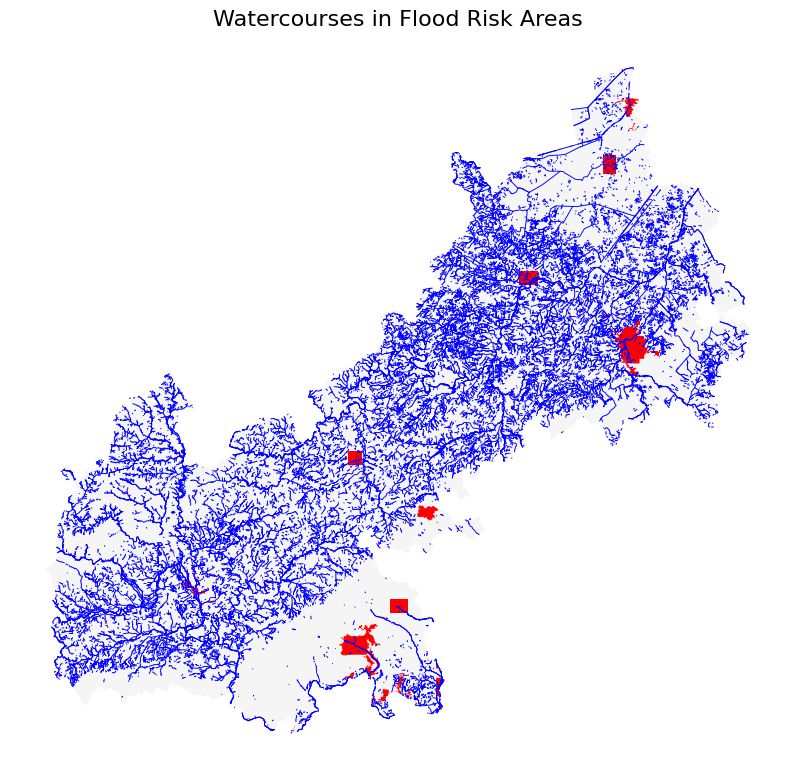

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
Region.plot(ax=ax, color= 'whitesmoke')
Clip_Flood_Risk_Area.plot(ax=ax, color='red')
Clip_Watercourses_Buffer.plot(ax = ax, color='blue')
ax.set_title('Watercourses in Flood Risk Areas', fontsize=16)
#Add the legend
ax.set_axis_off()
plt.show()